# 01. Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import (
    roc_curve, roc_auc_score, auc, 
    confusion_matrix, classification_report, accuracy_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# 02. Load and Explore the Dataset

In [3]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Plot class distribution

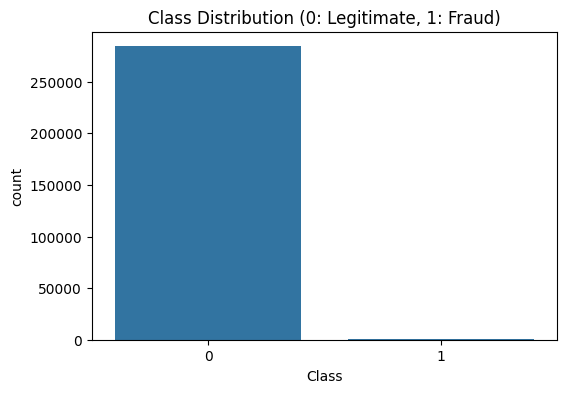

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Legitimate, 1: Fraud)')
plt.show() 

# 03. Data Preprocessing

In [14]:
scaler = RobustScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])  

x = df.drop('Class', axis=1)
y = df['Class'] 

# 04. Split Data into Training and Test Sets

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42) 

In [17]:
x_train.shape

(227845, 30)

In [18]:
x_test.shape

(56962, 30)

# 05. Train Multiple Classification Models 

In [19]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'SVM': SVC(probability=True, class_weight='balanced'),
    'XGBoost': XGBClassifier(scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))
}

# Train models and store ROC/AUC data
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_prob = model.predict_proba(x_test)[:, 1]  
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    results[name] = (fpr, tpr, roc_auc, thresholds) 

# Evaluate Models Using ROC Curves and AUC

C:\Users\REDTECH\AppData\Local\Temp\ipykernel_4604\329764424.py:24: RuntimeWarning: invalid value encountered in subtract
  idx = np.argmin(np.abs(thresholds_best - thresh))


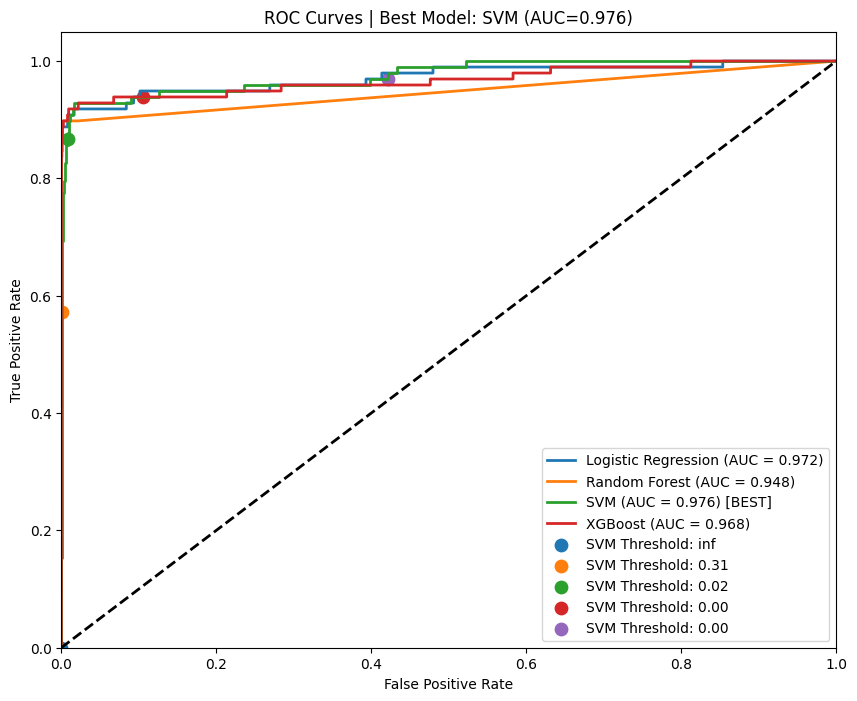

In [21]:
plt.figure(figsize=(10, 8))

# Find the best model by AUC
best_model_name = max(results, key=lambda k: results[k][2])
best_auc = results[best_model_name][2]

for name, (fpr, tpr, roc_auc, thresholds) in results.items():
    
    label = f'{name} (AUC = {roc_auc:.3f})'
    if name == best_model_name:
        label += ' [BEST]'
    plt.plot(fpr, tpr, lw=2, label=label)

# Plot thresholds ONLY for the best model
fpr_best, tpr_best, _, thresholds_best = results[best_model_name]

# Filter valid thresholds (remove NaN or invalid values)
thresholds_best = thresholds_best[~np.isnan(thresholds_best)]

# Select 5 evenly spaced thresholds
if len(thresholds_best) > 0:
    selected_thresholds = thresholds_best[::len(thresholds_best)//5][:5]
    for thresh in selected_thresholds:
        idx = np.argmin(np.abs(thresholds_best - thresh))
        plt.scatter(fpr_best[idx], tpr_best[idx], marker='o', s=80,
                    label=f'{best_model_name} Threshold: {thresh:.2f}')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curves | Best Model: {best_model_name} (AUC={best_auc:.3f})')
plt.legend(loc='lower right')
plt.show()

# 07. Determine Optimal Threshold for Best Model

Optimal Threshold for SVM: 0.007


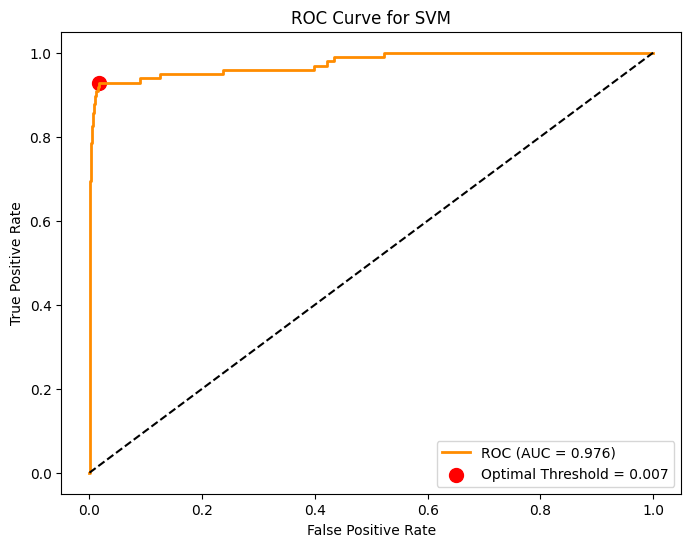

In [22]:
# Identify the best model (highest AUC)
best_model_name = max(results, key=lambda k: results[k][2])
fpr, tpr, roc_auc, thresholds = results[best_model_name]

# Calculate optimal threshold using Youden's J statistic
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold for {best_model_name}: {optimal_threshold:.3f}")

# Plot ROC curve for the best model with thresholds
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.3f})')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', s=100, label=f'Optimal Threshold = {optimal_threshold:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_model_name}')
plt.legend(loc='lower right')
plt.show()

# 08. Build and Evaluate Final Model with Optimal Threshold 

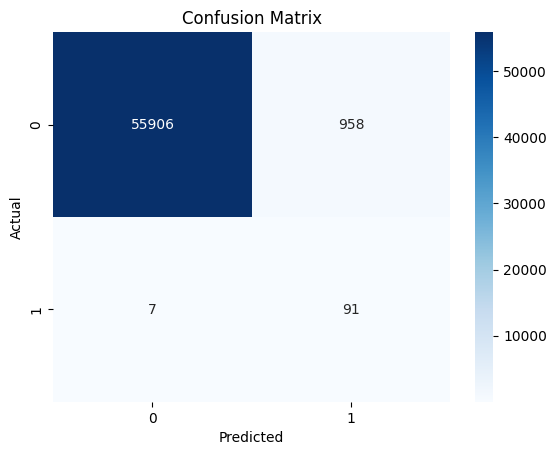

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.93      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.96      0.58     56962
weighted avg       1.00      0.98      0.99     56962

Accuracy: 0.983
Precision: 0.087
Recall: 0.929
F1-Score: 0.159


In [36]:
# Retrain the best model (if needed) and predict with optimal threshold
best_model = models[best_model_name]
y_prob = best_model.predict_proba(x_test)[:, 1]
y_pred = (y_prob >= optimal_threshold).astype(int)

# Confusion Matrix and Metrics
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# Print individual metrics
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

In [39]:
y_pred[1]

0

In [37]:
import pickle

# Save the model
model_filename = 'credit_card_fraud_detection.pickle'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved as {model_filename}") 

Model saved as credit_card_fraud_detection.pickle
